# Initialize globals

In [0]:
import pandas as pd
import numpy as np
import os, glob, re

project_path = 'C:/Users/vap43/Documents/GitHub/reddit_comment_classification/'
TRAIN_DATA_PATH = project_path + "data/data_train.pkl"
TEST_DATA_PATH = project_path + "data/data_test.pkl"

# Import the text and classes

In [0]:
train_data = pd.read_pickle(TRAIN_DATA_PATH)
test_data  = pd.read_pickle(TEST_DATA_PATH)

nb_X_Train = len(train_data[0])
All_X = np.concatenate((np.array(train_data[0]),np.array(test_data)))
y = np.array(train_data[1])

In [3]:
print(All_X.shape)
print(nb_X_Train)

(100000,)
70000


# Pre-process the data

Remove stop words and stem

In [0]:
from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.stem import WordNetLemmatizer 

# stemmer = PorterStemmer()
# lemmatizer = WordNetLemmatizer()
stop_words_list = stopwords.words('english')
pattern = re.compile(r'\b\w\w+\b')
word_count = np.zeros(All_X.shape[0])

for idx, sentence in enumerate(All_X):
  # All_X[idx] = " ".join([stemmer.stem(word) for word in re.findall(pattern, sentence.lower()) if word not in stop_words_list]) # NB 0.5592142857142857% acc
  # All_X[idx] = " ".join([lemmatizer.lemmatize(word) for word in re.findall(pattern, sentence.lower()) if word not in stop_words_list]) # NB 0.5592714285714285% acc
  All_X[idx] = " ".join([word for word in re.findall(pattern, sentence.lower()) if word not in stop_words_list]) # 0.5604428571428571% acc
  word_count[idx] = len(All_X[idx])
  # All_X[idx] = " ".join([word for word in re.findall(pattern, sentence.lower())]) # 51% acc NB

Count and weight the terms

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_transformer = TfidfVectorizer(
  # ngram_range=(1, 3), # NB 0.5604428571428571
  # ngram_range=(1, 2), # NB 0.5621285714285714
  # ngram_range=(2, 3), # NB 0.3079428571428572
  ngram_range=(1, 1),   # NB 0.5690285714285714
  # min_df=1,   # NB 0.5683714285714285
  min_df=2, # NB 0.5690285714285714
  # min_df=3, # NB 0.5674857142857143
  strip_accents = "unicode", # NB True: 0.5690285714285714 False: 0.5689571428571428
  sublinear_tf=True # NB False: 0.5690285714285714 True: 0.5692714285714285
)
All_X_ifidf = tfidf_transformer.fit_transform(All_X)
print(All_X_ifidf.shape)

(100000, 41899)


TODO: Add extra features?

In [40]:
All_X_ifidf = np.concatenate((All_X_ifidf,word_count.reshape(1)),axis=1)


ValueError: ignored

Split out the Train/test data

In [0]:
# X = All_X_SVD[:nb_X_Train,:]
# Kaggle_Test_X = All_X_SVD[nb_X_Train:,:]

X = All_X_ifidf[:nb_X_Train,:]
Kaggle_Test_X = All_X_ifidf[nb_X_Train:,:]

In [0]:
from sklearn.model_selection import train_test_split
# Train_X, Test_X, Train_y, Test_y = train_test_split(X,y, test_size=0.1, random_state=0, stratify=y)
Train_X, Train_y = X, y

In [0]:
# from sklearn.naive_bayes import MultinomialNB

# print(Train_X.shape)
# print(Train_y.shape)

# clf = MultinomialNB(alpha=0.3)
# clf.fit(Train_X, Train_y)
# clf.score(Test_X, Test_y)
# #0.5725714285714286 sublinear_tf=True
# #0.575 sublinear_tf=False


# Try out keras

In [0]:
# from sklearn.preprocessing import OneHotEncoder

# onehot_encoder = OneHotEncoder(sparse=False)
# # integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(Train_y.reshape(-1,1))
# #onehot_encoded_test = onehot_encoder.transform(Test_y.reshape(-1,1))
# y_onehot = onehot_encoder.transform(y.reshape(-1,1))

In [0]:
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout, BatchNormalization, GaussianNoise
# from keras.regularizers import l2
# from keras.optimizers import Adagrad, Adam
# from keras.constraints import max_norm

# model = Sequential([
#   # Input layer
#   Dense(
#     1024,
#     use_bias=False,
#     input_shape=(Train_X.shape[1],),
#     #kernel_regularizer=l2(0.0001),
#     kernel_constraint=max_norm(3.),
#   ),
#   BatchNormalization(),
#   Activation('relu'),
#   #Dropout(0.5),

#   # # Hidden Layer
#   # Dense(
#   #   512,
#   #   use_bias=False,
#   #   kernel_regularizer=l2(0.001),
#   #   kernel_constraint=max_norm(3.),
#   # ),
#   # BatchNormalization(),
#   # Activation('relu'),
#   # Dropout(0.5),

#   # Output layer
#   Dense(
#     20,
#     use_bias=False
#   ),
#   BatchNormalization(),
#   Activation('softmax'),
# ])

# model.compile(
#   Adagrad(learning_rate=0.003),
#   loss='categorical_crossentropy',
#   metrics=['accuracy']
# )

# #model.fit(Train_X, onehot_encoded, epochs=1, batch_size=64, validation_data=(Test_X,onehot_encoded_test))
# model.fit(X, y_onehot, epochs=1, batch_size=64)

In [0]:
# y_onehot = model.predict(Kaggle_Test_X)

In [0]:
# y_kaggle = onehot_encoder.inverse_transform(y_onehot)
# y_kaggle = y_kaggle.squeeze()
# print(y_kaggle.shape)

In [0]:
# def create_and_save_submission(predictions, file_name="submission.csv"):
#     ids = [i for i in range(len(predictions))]
#     sub_df = pd.DataFrame(data=list(zip(ids, predictions)), columns=["Id","Category"])
#     sub_df.to_csv(file_name, index=False)

# create_and_save_submission(y_kaggle)

# Create a list of algorithms to test

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


names = ["Tree", "Forest","KNN","NB", "SVC", "AdaBoost", "SGD", "log", "Bag", "Vote", "NN", "LDA"]

classifiers = [
  DecisionTreeClassifier( **{'min_samples_leaf': 0.01, 'max_features': 1.0, 'max_depth': 100}),
  RandomForestClassifier( **{'n_estimators': 30, 'min_samples_leaf': 0.001, 'max_features': 1.0, 'max_depth': 100,}), #26.2% acc
  KNeighborsClassifier(   **{'weights': 'distance', 'p': 1, 'n_neighbors': 40}),
  MultinomialNB(          **{'alpha': 0.25}), # 0.569% acc
  LinearSVC(              **{'dual': False, 'C': 0.1}),
  AdaBoostClassifier(     **{'n_estimators': 100, 'learning_rate': 1.0}),
  SGDClassifier(          **{'penalty': 'l2', 'loss': 'modified_huber', 'class_weight': 'balanced', 'alpha': 0.0001}), # 0.5631
  LogisticRegression(     **{'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'auto', 'max_iter': 100, 'C': 1.5}), # 0.5464428571428571
  BaggingClassifier(base_estimator=LinearSVC(**{'C': 0.1})),
  # VotingClassifier(estimators=[
  #                              ('lsvc', LinearSVC(C=0.1)),
  #                              ('mnb', MultinomialNB(alpha=0.3)),
  #                              ('nn', MLPClassifier(**{'max_iter': 1, 'hidden_layer_sizes': (256,), 'batch_size': 64})),
  #                              ]), # 57.2% acc
  # VotingClassifier(estimators=[
  #                              ('lg',LogisticRegression(**{'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'auto', 'max_iter': 100, 'C': 1.5})),
  #                              ('mnb', MultinomialNB(alpha=0.25)),
  #                              ('nn', MLPClassifier(**{'max_iter': 1, 'hidden_layer_sizes': (256,), 'batch_size': 64})),
  #                              ],
  #                  voting='soft',
  #                  weights=[1,1,1]), # 0.5755571428571429% acc
  VotingClassifier(estimators=[
                               ('sgd',SGDClassifier(**{'penalty': 'l2', 'loss': 'modified_huber', 'class_weight': 'balanced', 'alpha': 0.0001})),
                               ('mnb', MultinomialNB(alpha=0.25)),
                               ('nn', MLPClassifier(**{'max_iter': 1, 'hidden_layer_sizes': (256,), 'batch_size': 64})),
                               ],
                   voting='soft',
                   weights=[1,1,1],
                   n_jobs=-1), # 0.5809% Acc
  # VotingClassifier(estimators=[
  #                              ('lg',SGDClassifier(**{'penalty': 'l2', 'alpha': 0.00003})),
  #                              ('mnb', MultinomialNB(alpha=0.25)),
  #                              ('nn', MLPClassifier(**{'max_iter': 1, 'hidden_layer_sizes': (256,), 'batch_size': 64})),
  #                              ],
  #                  voting='soft',
  #                  weights=[1,1,1], # based on test fold accuracy
  #                  n_jobs=-1), # ?% Acc
  MLPClassifier(**{'max_iter': 1, 'hidden_layer_sizes': (256,), 'batch_size': 64}), # 0.5738000000000001% acc
  LinearDiscriminantAnalysis()
]

for name, clf in zip(names, classifiers):
  if name not in ['Vote']: continue
  scores = cross_val_score(clf, Train_X, Train_y, cv=4, scoring='accuracy',n_jobs=-1)
  print(name + ' Accuracy: ' + str(scores.mean()) + ' | std = ' + str(scores.std()))


Vote Accuracy: 0.5809 | std = 0.0014424327522965992


# Choose the best hyperparameters for each algorithm

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import Audio
sound_file = 'C:/Users/vap43/AppData/Local/BlueJeans/current/Assets/Sounds/recording_stopped.mp3'

Tree_param = {
  'max_features'    : [0.01, 0.03, 0.1, 0.3, 1.0],
  'max_depth'       : [3, 10, 30, 100],
  'min_samples_leaf': [0.01, 0.03, 0.1, 0.3],
}

Forest_param = {
  'n_jobs'          : [1],
  'n_estimators'    : [10, 30, 100, 300],
  'max_features'    : [1.0],
  'max_depth'       : [3, 10, 30, 100],
  'min_samples_leaf': [0.001, 0.003, 0.01, 0.03, 0.1],
}

knn_param = {
  'n_neighbors' : [1,3,10,20,40,60],
  'weights'     : ['uniform', 'distance'],
  'p'           : [1, 2],
}

nb_param = {
  'alpha' : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
}

svc_param = {
  #'kernel'        : ["linear"],
  'C'             : [0.01, 0.03, 0.063, 0.83, 0.1, 0.12, 0.15, 0.2, 0.3, 1.0],
  'dual'          : [False],
}

ada_param = {
  # 'n_estimators'  : [20, 50, 100],
  # 'learning_rate' : [0.01, 0.03, 0.1, 0.3, 1.0],
  'n_estimators'  : [100],
  'learning_rate' : [1.0],
}

sgd_param = {
  'loss'    : ['log', 'modified_huber'],
  'penalty' : ['l2'],
  'alpha'   : [0.00003, 0.000063, 0.0001, 0.0003, 0.00063],
  'class_weight' : [None, 'balanced'],
}

log_param = {
  'penalty'     : ['l2'],
  'solver'      : ['lbfgs'],
  'multi_class' : ['auto'],
  'C'           : [0.3, 0.63, 1.0, 1.25, 1.5, 1.75, 2.0],
  'max_iter'    : [100, 300]
}

bag_param = {
    'base_estimator' : [LinearSVC(C=0.1), LinearSVC(C=0.3), LinearSVC(C=1.0)],
    'max_features'   : [0.3, 0.6, 1.0],
    'max_samples'    : [0.3, 0.6, 1.0],
}

vote_param = {
    'estimators' : [[
      ('lg',LogisticRegression(**{'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'auto', 'max_iter': 100, 'C': 1.5})),
      ('mnb', MultinomialNB(alpha=0.25)),
      ('nn', MLPClassifier(**{'max_iter': 1, 'hidden_layer_sizes': (256,), 'batch_size': 64})),
    ]],
    'n_jobs' : [-1],
    'voting' : ['soft'],
    'weights' : [[1,1,1], [54.3, 56.7, 57.3]],
}

nn_param = {
    'max_iter'           : [1],
    'hidden_layer_sizes' : ((64,), (128,), (256,), (512,), (1024,)),
    'batch_size'         : [64],
}

grid_parameters = [
  Tree_param,
  Forest_param,
  knn_param,
  nb_param,
  svc_param,
  ada_param,
  sgd_param,
  log_param,
  bag_param,
  vote_param,
  nn_param
]

for name, clf, grid_params in zip(names, classifiers, grid_parameters):
  if name not in ['SGD']: continue
  gd_sr = RandomizedSearchCV(
    estimator=clf,
    param_distributions=grid_params,
    scoring='accuracy',
    cv=4,
    n_jobs=-1,
    n_iter=20
  )
  gd_sr.fit(Train_X, Train_y)
  best_parameters = gd_sr.best_params_
  best_result = gd_sr.best_score_
  print(name, best_result, best_parameters)

Audio(sound_file, autoplay=True)
# Bag 0.5571428571428572 {'max_samples': 0.6, 'max_features': 1.0, 'base_estimator': LinearSVC(C=0.1

SGD 0.563 {'penalty': 'l2', 'loss': 'modified_huber', 'class_weight': 'balanced', 'alpha': 0.0001}


# Export Sklearn model: predict on Kaggle set

In [0]:
clf =   VotingClassifier(estimators=[
    ('sgd',SGDClassifier(**{'penalty': 'l2', 'loss': 'modified_huber', 'class_weight': 'balanced', 'alpha': 0.0001})),
    ('mnb', MultinomialNB(alpha=0.25)),
    ('nn', MLPClassifier(**{'max_iter': 1, 'hidden_layer_sizes': (256,), 'batch_size': 64})),
    ],
  voting='soft',
  weights=[1,1,1],
  n_jobs=-1
) # 0.5809% Test Acc

In [26]:
print(X.shape)
print(y.shape)
clf.fit(X, y) # Fit all training data

(70000, 41899)
(70000,)


VotingClassifier(estimators=[('sgd',
                              SGDClassifier(alpha=0.0001, average=False,
                                            class_weight='balanced',
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='modified_huber',
                                            max_iter=1000, n_iter_no_change=5,
                                            n_jobs=None, penalty='l2',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fracti...
                                            beta_2=0.999, early_stopping=False,
                                 

In [27]:
Kaggle_y_pred = clf.predict(Kaggle_Test_X)
print(Kaggle_y_pred.shape)

(30000,)


In [0]:
def create_and_save_submission(predictions, file_name="submission.csv"):
    ids = [i for i in range(len(predictions))]
    sub_df = pd.DataFrame(data=list(zip(ids, predictions)), columns=["Id","Category"])
    sub_df.to_csv(file_name, index=False)

create_and_save_submission(Kaggle_y_pred)

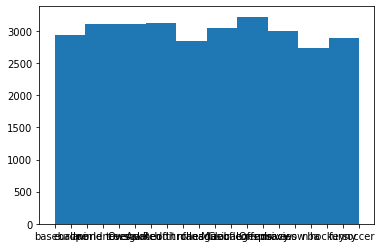

In [30]:
# TODO: Force class weights to be 5% likely?
import matplotlib.pyplot as plt
plt.hist(Kaggle_y_pred)
plt.show()